# Backpack baseline prediction

1. Charger les données
2. Prétraiter les données (gestion des valeurs manquantes, encodage des variables, etc.)
3. Séparer les données en train/test
4. Entraîner un modèle régression linéaire
5. Entraîner des modèles MLP (réseau de neurones)
6. Entraîner un CNN
6. Évaluer avec RMSE
7. Générer le fichier de soumission

## 1. Charger les données

In [3]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [4]:
import pandas as pd
#train_path = "/kaggle/input/playground-series-s5e2/train.csv"
#test_path = "/kaggle/input/playground-series-s5e2/test.csv"
#training_extra_path = "/kaggle/input/playground-series-s5e2/training_extra_path.csv"
#sample_submission_path = "/kaggle/input/playground-series-s5e2/sample_submission.csv"

train_path = "/kaggle/input/playground-series-s5e2/train.csv"
test_path = "/kaggle/input/playground-series-s5e2/test.csv"
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

# Afficher les premières lignes du fichier
print(test.head())

       id   Brand Material    Size  Compartments Laptop Compartment  \
0  300000    Puma  Leather   Small           2.0                 No   
1  300001    Nike   Canvas  Medium           7.0                 No   
2  300002  Adidas   Canvas   Large           9.0                 No   
3  300003  Adidas    Nylon   Large           1.0                Yes   
4  300004     NaN    Nylon   Large           2.0                Yes   

  Waterproof      Style  Color  Weight Capacity (kg)  
0         No       Tote  Green             20.671147  
1        Yes   Backpack  Green             13.564105  
2        Yes  Messenger   Blue             11.809799  
3         No  Messenger  Green             18.477036  
4        Yes       Tote  Black              9.907953  


## 2. Prétraitement

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

def preprocess_data(train, test):
    num_features = ["Compartments", "Weight Capacity (kg)"]
    cat_features = ["Brand", "Material", "Size", "Laptop Compartment", "Waterproof", "Style", "Color"]

    num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

    cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ])

    preprocessor = ColumnTransformer([
        ("num", num_pipeline, num_features),
        ("cat", cat_pipeline, cat_features)
    ])

    X = train.drop(columns=["id", "Price"])
    y = train["Price"]
    X_test = test.drop(columns=["id"])

    X_transformed = preprocessor.fit_transform(X)
    X_test_transformed = preprocessor.transform(X_test)

    return X_transformed, y, X_test_transformed, preprocessor

# Utilisation de la fonction preprocess_data
X_transformed, y, X_test_transformed, preprocessor = preprocess_data(train, test)

# Séparation des données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X_transformed, y, test_size=0.2, random_state=42)



## 3. Modèle de Régression Linéaire

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

# 🔹 6. Modèle Régression Linéaire
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_val)
mse_lin = mean_squared_error(y_val, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
print(f"RMSE Régression Linéaire: {rmse_lin:.4f}")

# 🔹 8. Prédictions sur le test set
test_preds = lin_reg.predict(X_test_transformed)

# 🔹 9. Générer le fichier de soumission
#submission = pd.DataFrame({"id": test["id"], "Price": test_preds})
#submission.to_csv("submission.csv", index=False)

print("Fichier submission_RL.csv généré avec succès !")


RMSE Régression Linéaire: 38.9210
Fichier submission_RL.csv généré avec succès !


# MLPs et CNN

In [6]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import layers

MLP 512-128-64
Epoch 1/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1972.0511 - root_mean_squared_error: 43.7601 - val_loss: 1527.9607 - val_root_mean_squared_error: 39.0891
Epoch 2/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1534.4325 - root_mean_squared_error: 39.1717 - val_loss: 1526.0192 - val_root_mean_squared_error: 39.0643
Epoch 3/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1529.2336 - root_mean_squared_error: 39.1054 - val_loss: 1528.1396 - val_root_mean_squared_error: 39.0914
Epoch 4/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1531.6523 - root_mean_squared_error: 39.1361 - val_loss: 1539.7404 - val_root_mean_squared_error: 39.2395
Epoch 5/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1530.8585 - root_mean_squared_error: 39.1261 - val_loss: 1531.0361 - val_root_mean_squared_error: 39.1285
Epoch 6/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1535.4520 - root_mean_squared_error: 39.1847 - val_loss: 1526.8557 - val_root

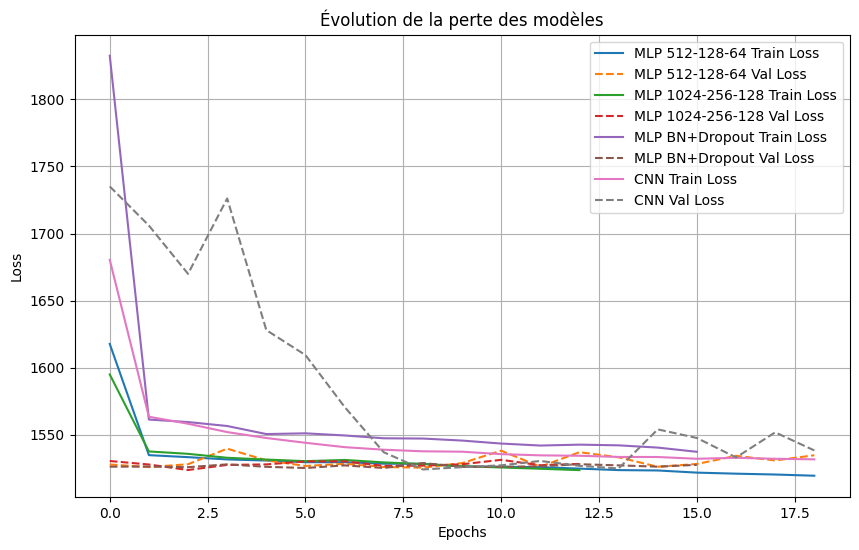

              Model  RMSE Train  RMSE Validation
0    MLP 512-128-64   39.028206        38.971466
1  MLP 1024-256-128   39.053627        38.955189
2    MLP BN+Dropout   39.056633        38.968311
3               CNN   39.053978        38.946411


In [6]:
# Reshape pour le modèle CNN
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_val_cnn = np.expand_dims(X_val, axis=-1)

# Modèles à tester
models = {
    "MLP 512-128-64": keras.models.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(512, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1, activation="linear")
    ]),
    "MLP 1024-256-128": keras.models.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(1024, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(1, activation="linear")
    ]),
    "MLP BN+Dropout": keras.models.Sequential([
        layers.Input(shape=[X_train.shape[1]]),
        layers.Dense(1024, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(256, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(128, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(64, activation="relu"),
        layers.Dense(1, activation="linear")
    ]),
    "CNN": keras.models.Sequential([
        layers.Input(shape=[X_train.shape[1], 1]),
        layers.Conv1D(64, 3, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.MaxPooling1D(2),
        layers.Conv1D(128, 3, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.MaxPooling1D(2),
        layers.Conv1D(256, 3, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.MaxPooling1D(2),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(1, activation="linear")
    ])
}

# Stocker les résultats
results = []
all_histories = {}

for name, model in models.items():
    print(name)
    optimizer = keras.optimizers.Adam(learning_rate=0.0005)
    model.compile(loss="mse", optimizer=optimizer, metrics=[keras.metrics.RootMeanSquaredError()])
    early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

    if name == "CNN":
        history = model.fit(X_train_cnn, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1, callbacks=[early_stopping])
        rmse_train = model.evaluate(X_train_cnn, y_train, verbose=0)[1]
        rmse_val = model.evaluate(X_val_cnn, y_val, verbose=0)[1]
    else:
        history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1, callbacks=[early_stopping])
        rmse_train = model.evaluate(X_train, y_train, verbose=0)[1]
        rmse_val = model.evaluate(X_val, y_val, verbose=0)[1]

    results.append({"Model": name, "RMSE Train": rmse_train, "RMSE Validation": rmse_val})
    all_histories[name] = history.history

# Tracer toutes les courbes de loss sur un même graphique
plt.figure(figsize=(10, 6))
for name, history in all_histories.items():
    plt.plot(history["loss"], label=f"{name} Train Loss")
    plt.plot(history["val_loss"], linestyle="dashed", label=f"{name} Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Évolution de la perte des modèles")
plt.legend()
plt.grid(True)
plt.show()

# Comparer les résultats
df_results = pd.DataFrame(results)
print(df_results)
df_results.to_csv("results.csv")

# Hyperparameter tunning

Trial 10 Complete [00h 01m 51s]
val_loss: 1526.697998046875

Best val_loss So Far: 1522.6068115234375
Total elapsed time: 00h 18m 47s
Epoch 1/100
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 1954.7742 - root_mean_squared_error: 43.6082 - val_loss: 1528.1259 - val_root_mean_squared_error: 39.0913
Epoch 2/100
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1531.9127 - root_mean_squared_error: 39.1396 - val_loss: 1526.8508 - val_root_mean_squared_error: 39.0749
Epoch 3/100
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1529.2358 - root_mean_squared_error: 39.1053 - val_loss: 1530.3998 - val_root_mean_squared_error: 39.1203
Epoch 4/100
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1528.2517 - root_mean_squared_error: 39.0927 - val_loss: 1524.7103 - val_root_mean_squared_error: 39.0475
Epoch 5/100
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1533.4180 - root_mean_squared_error: 39.1588 - val_loss: 1526.2155 - val_root_mean_squared_error: 39.0668
Epoch 6/100
6000

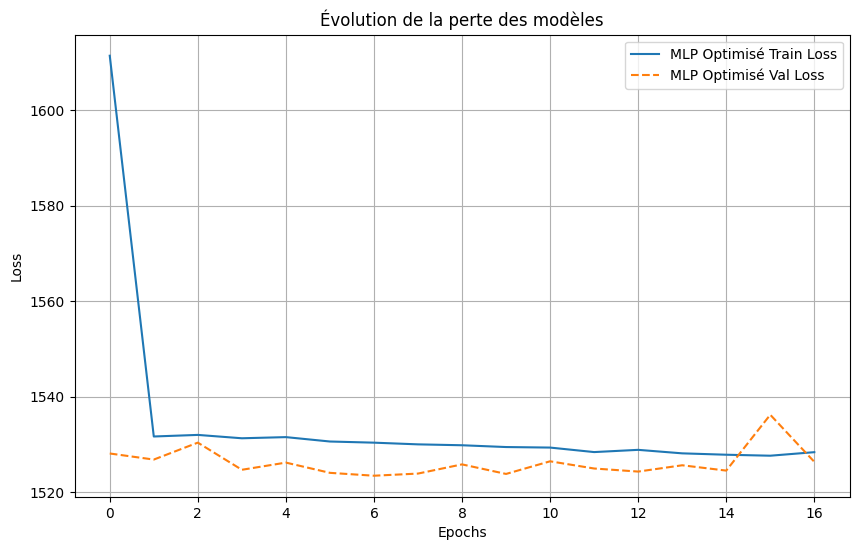

          Model  RMSE Train  RMSE Validation
0  MLP Optimisé   39.015842        38.971664


In [21]:
#Do not re-run on a déja obtenu les résultats

import keras_tuner as kt


# Reshape pour le modèle CNN
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_val_cnn = np.expand_dims(X_val, axis=-1)

# Fonction pour construire le modèle avec Keras Tuner
def build_model(hp):
    model = keras.models.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))

    for i in range(hp.Int("num_layers", 1, 3)):
        model.add(layers.Dense(hp.Int(f"units_{i}", min_value=64, max_value=1024, step=64), activation="relu"))
        if hp.Boolean(f"dropout_{i}"):
            model.add(layers.Dropout(rate=hp.Float(f"dropout_rate_{i}", min_value=0.1, max_value=0.5, step=0.1)))

    model.add(layers.Dense(1, activation="linear"))

    optimizer = keras.optimizers.Adam(learning_rate=hp.Choice("learning_rate", [1e-3, 5e-4, 1e-4]))
    model.compile(loss="mse", optimizer=optimizer, metrics=[keras.metrics.RootMeanSquaredError()])

    return model

# Définition du tuner
tuner = kt.RandomSearch(
    build_model,
    objective="val_loss",
    max_trials=10,
    executions_per_trial=1,
    directory="mlp_tuning",
    project_name="mlp_tuning"
)

# Exécuter la recherche des hyperparamètres
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[keras.callbacks.EarlyStopping(patience=5)])

# Meilleur modèle
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

# Entraînement final
history = best_model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[keras.callbacks.EarlyStopping(patience=10)])

# Évaluation du meilleur modèle
rmse_train = best_model.evaluate(X_train, y_train, verbose=0)[1]
rmse_val = best_model.evaluate(X_val, y_val, verbose=0)[1]

# Stocker les résultats des modèles existants
models = {
    "MLP Optimisé": best_model
}

results = [{"Model": "MLP Optimisé", "RMSE Train": rmse_train, "RMSE Validation": rmse_val}]
all_histories = {"MLP Optimisé": history.history}

# Tracer toutes les courbes de loss sur un même graphique
plt.figure(figsize=(10, 6))
for name, history in all_histories.items():
    plt.plot(history["loss"], label=f"{name} Train Loss")
    plt.plot(history["val_loss"], linestyle="dashed", label=f"{name} Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Évolution de la perte des modèles")
plt.legend()
plt.grid(True)
plt.show()

# Comparer les résultats
df_results = pd.DataFrame(results)
print(df_results)


Epoch 1/100
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 3407.4753 - root_mean_squared_error: 56.9932 - val_loss: 1523.2665 - val_root_mean_squared_error: 39.0290
Epoch 2/100
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1527.4539 - root_mean_squared_error: 39.0824 - val_loss: 1522.5656 - val_root_mean_squared_error: 39.0201
Epoch 3/100
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1526.0905 - root_mean_squared_error: 39.0651 - val_loss: 1522.3276 - val_root_mean_squared_error: 39.0170
Epoch 4/100
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1522.3118 - root_mean_squared_error: 39.0167 - val_loss: 1523.1182 - val_root_mean_squared_error: 39.0271
Epoch 5/100
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1528.3281 - root_mean_squared_error: 39.0937 - val_loss: 1522.4248 - val_root_mean_squared_error: 39.0183
Epoch 6/100
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1529.5199 - root_mean_squared_error: 39.1089 - val_loss: 1523.9230 - val_root_mean_squ

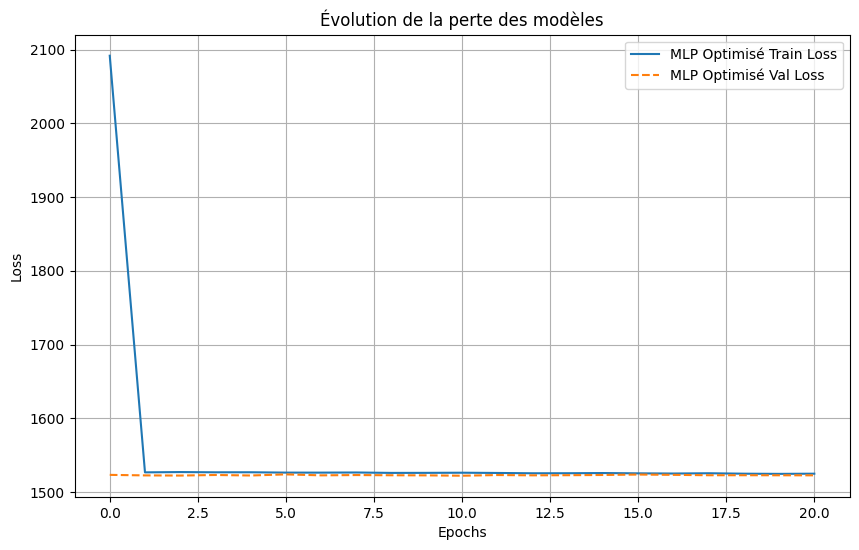

          Model  RMSE Train  RMSE Validation
0  MLP Optimisé   39.016422        38.925491


In [22]:
# Meilleurs hyperparamètres trouvés par le tuner
best_hps = {
    'num_layers': 1,
    'learning_rate': 0.0001,
    'units_0': 832,
    'dropout_0': True,
    'dropout_rate_0': 0.1
}

# Construction du modèle avec les hyperparamètres optimisés
def build_optimized_model(hp):
    model = keras.models.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))

    # Ajouter les couches avec les meilleurs hyperparamètres
    for i in range(best_hps['num_layers']):
        model.add(layers.Dense(best_hps[f"units_{i}"], activation="relu"))
        if best_hps[f"dropout_{i}"]:
            model.add(layers.Dropout(rate=best_hps[f"dropout_rate_{i}"]))

    model.add(layers.Dense(1, activation="linear"))

    # Optimiseur avec le meilleur taux d'apprentissage
    optimizer = keras.optimizers.Adam(learning_rate=best_hps['learning_rate'])
    model.compile(loss="mse", optimizer=optimizer, metrics=[keras.metrics.RootMeanSquaredError()])

    return model

# Créer le modèle optimisé
optimized_model = build_optimized_model(best_hps)

# Entraînement du modèle optimisé
history = optimized_model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[keras.callbacks.EarlyStopping(patience=10)])

# Évaluation du modèle optimisé
rmse_train = optimized_model.evaluate(X_train, y_train, verbose=0)[1]
rmse_val = optimized_model.evaluate(X_val, y_val, verbose=0)[1]

# Résultats du modèle optimisé
models = {
    "MLP Optimisé": optimized_model
}

results = [{"Model": "MLP Optimisé", "RMSE Train": rmse_train, "RMSE Validation": rmse_val}]
all_histories = {"MLP Optimisé": history.history}

# Tracer toutes les courbes de loss sur un même graphique
plt.figure(figsize=(10, 6))
for name, history in all_histories.items():
    plt.plot(history["loss"], label=f"{name} Train Loss")
    plt.plot(history["val_loss"], linestyle="dashed", label=f"{name} Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Évolution de la perte des modèles")
plt.legend()
plt.grid(True)
plt.show()

# Comparer les résultats
df_results = pd.DataFrame(results)
print(df_results)


# CNN 2

Epoch 1/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 2935.2715 - val_loss: 1555.1333
Epoch 2/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1588.2875 - val_loss: 1536.4166
Epoch 3/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1565.1426 - val_loss: 1533.6060
Epoch 4/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1559.3088 - val_loss: 1535.1976
Epoch 5/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1560.2623 - val_loss: 1535.3964
Epoch 6/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1557.3383 - val_loss: 1551.7773
Epoch 7/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1556.7012 - val_loss: 1544.7246
Epoch 8/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1549.4657 - val_loss: 1546.7383
Epoch 9/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1549.3868 - val_loss: 1538.8740
Epoch 10/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1551.1183 - val_loss: 1554.1475
Epoch 11/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2

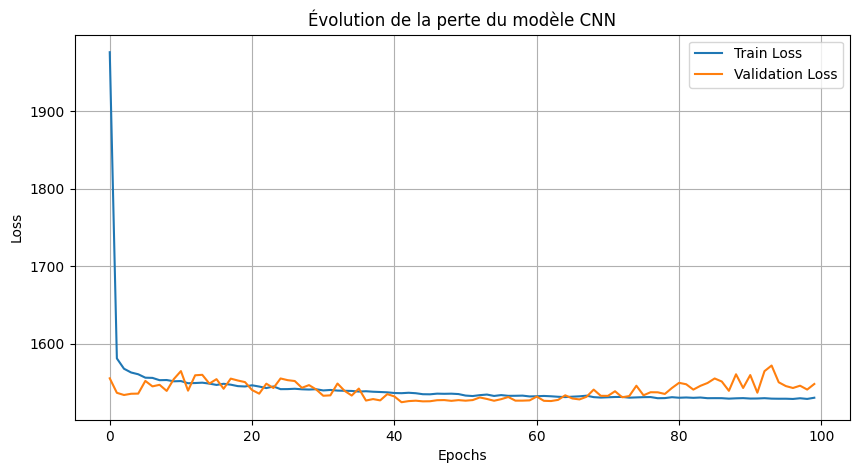

7500/7500 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [22]:
from sklearn.neighbors import KNeighborsRegressor
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Définition du CNN avec ajustement du taux d'apprentissage et simplification du modèle
cnn_model = keras.models.Sequential([
        layers.Input(shape=[X_train.shape[1], 1]),
        layers.Conv1D(64, 3, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.MaxPooling1D(2),
        layers.Conv1D(128, 3, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.MaxPooling1D(2),
        layers.Conv1D(256, 3, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.MaxPooling1D(2),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(1, activation="linear")
])

# Compiler et entraîner le CNN avec le nouveau taux d'apprentissage
cnn_model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=0.0001))
history = cnn_model.fit(X_train_cnn, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1)

# Tracer la courbe de perte (loss)
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Évolution de la perte du modèle CNN')
plt.legend()
plt.grid()
plt.show()

X_train_features = cnn_model.predict(X_train_cnn)
X_val_features = cnn_model.predict(X_val_cnn)

In [ ]:
X_test_cnn = np.expand_dims(X_test_transformed, axis=-1)
X_test_features = cnn_model.predict(X_test_cnn)
print(X_test_features.shape[0])
print(test['id'].shape[0])
if X_test_features.shape[0] != test['id'].shape[0]:
    X_test_features = X_test_features[:test['id'].shape[0]]

linear_reg = LinearRegression()
linear_reg.fit(X_train_features, y_train)

# Prédictions et évaluation
linear_predictions = linear_reg.predict(X_val_features)
rmse_linear = np.sqrt(mean_squared_error(y_val, linear_predictions))
print(f"RMSE du modèle CNN+LinearRegression : {rmse_linear}")

# Prédictions sur les données de test
linear_test_predictions = linear_reg.predict(X_test_features)
submission_df = pd.DataFrame({
    "id": test["id"],
    "Price": linear_test_predictions
})

submission_df.to_csv("submission.csv", index=False)


6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
200000
200000


In [24]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_features, y_train)


# Prédictions et évaluation
linear_predictions = linear_reg.predict(X_val_features)
rmse_linear = np.sqrt(mean_squared_error(y_val, linear_predictions))
print(f"RMSE du modèle CNN+LinearRegression : {rmse_linear}")

# Prédictions sur les données de test
linear_test_predictions = linear_reg.predict(X_test_features)

# Création du DataFrame final avec id et prix
submission_df = pd.DataFrame({
    "id": test["id"],
    "Price": linear_test_predictions
})

# Affichage des premières lignes
print(submission_df.head())

# Sauvegarde des prédictions
submission_df.to_csv("submission.csv", index=False)

RMSE du modèle CNN+LinearRegression : 38.94967423347855
       id      Price
0  300000  78.960182
1  300001  82.799835
2  300002  83.238655
3  300003  79.717934
4  300004  78.372765
